Import Required Libraries


In [10]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)



Load Iris datset

In [11]:

iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
class_names = iris.target_names

print("Features:", feature_names)
print("Classes:", class_names)


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

ID3 Model

In [13]:
id3_model = DecisionTreeClassifier(
    criterion="entropy",  # ID3
    max_depth=3,          # 🔴 Depth controlled
    random_state=42
)

id3_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

Prediction

In [14]:
y_pred = id3_model.predict(X_test)

Evaluation

In [15]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
cm = confusion_matrix(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy : 0.9777777777777777
Precision: 0.9761904761904763
Recall   : 0.9743589743589745
F1 Score : 0.974320987654321

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



Visulize the ID3 Decision Tree

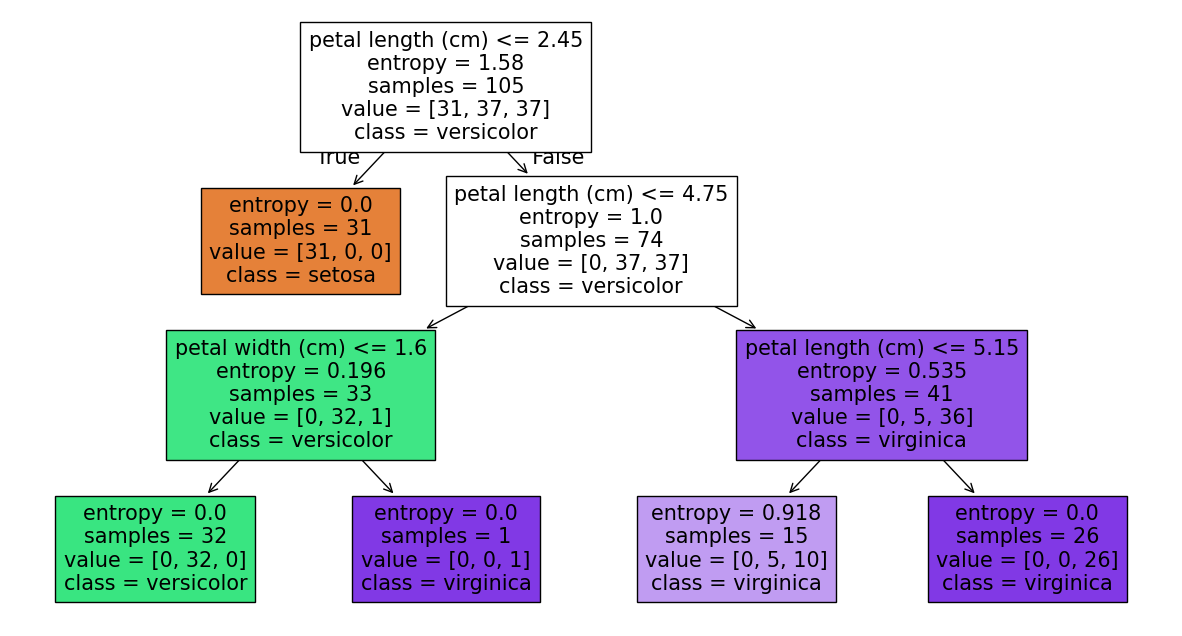

In [16]:
plt.figure(figsize=(15, 8))
plot_tree(
    id3_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True
)
plt.show()

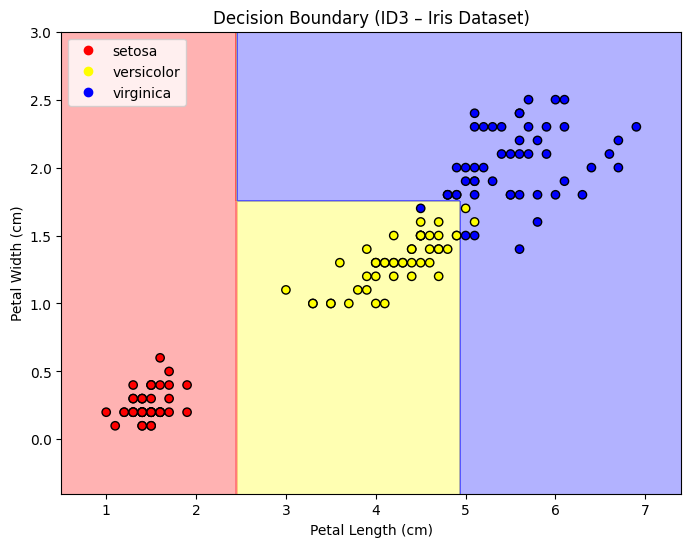

In [21]:
from matplotlib.colors import ListedColormap

# Use only 2 features for visualization
X_vis = X[:, [2, 3]]  # petal length, petal width
y_vis = y

# Train ID3 on 2 features
id3_vis = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    random_state=42
)
id3_vis.fit(X_vis, y_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 0.5, X_vis[:, 0].max() + 0.5
y_min, y_max = X_vis[:, 1].min() - 0.5, X_vis[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = id3_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'yellow', 'blue']))

# Plot data points
scatter = plt.scatter(
    X_vis[:, 0], X_vis[:, 1],
    c=y_vis, edgecolor='k',
    cmap=ListedColormap(['red', 'yellow', 'blue'])
)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Decision Boundary (ID3 – Iris Dataset)")
plt.legend(handles=scatter.legend_elements()[0], labels=list(class_names))
plt.show()